In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
plt.gcf().set_size_inches(14/2.54,8/2.54)
def fonction_bruitee(x, bruit=0.1, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    # Fonction de base avec plusieurs minimums locaux
    y = np.sin(5 * x) * np.cos(2 * x) + 0.5 * np.sin(5 * x)
    
    # Ajout d'un terme exponentiel pour augmenter la non-linéarité
    y += 0.2 * np.exp(-0.5 * (x - 2)**2) - 0.3 * np.exp(-0.5 * (x + 2)**2)
    
    # Ajout de bruit gaussien
    bruit_gaussien = bruit * np.random.normal(size=np.shape(x))
    return y + bruit_gaussien

# Création des figures et axes
fig, ax = plt.subplots(2, 1, layout="constrained", figsize=(8, 6))
fig.text(0.02, 0.98, "(a)", weight='bold', va='top', ha='left', transform=fig.transFigure, fontsize=20)
fig.text(0.02, 0.52, "(b)", weight='bold', va='top', ha='left', transform=fig.transFigure, fontsize=20)

# Génération des données
x = np.linspace(-5, 5, 1000)
y = fonction_bruitee(x, bruit=0.3, seed=42)
y2 = fonction_bruitee(x, bruit=0, seed=42)

# Plage à illustrer
x_range = (-2.5, -1.5)
y_range = (-0.5, 0.1)

# Tracé principal
for i, (y_data, title) in enumerate(zip([y, y2], ["Bruitée", "Non-bruitée"])):
    ax[i].plot(x, y_data, label=title)
    ax[i].set_ylabel("y", fontsize=15)
    ax[i].set_title(title, fontsize=15)
    ax[i].grid()
    ax[i].tick_params(axis='both', which='major', labelsize=15)

    # Ajout d'un rectangle pour la portion zoomée
    ax[i].add_patch(plt.Rectangle((x_range[0], y_range[0]),
                                   x_range[1] - x_range[0], y_range[1] - y_range[0],
                                   edgecolor='red', facecolor='none', lw=1.5, linestyle='--'))
    
    # Ajout de l'inset à droite
    inset = inset_axes(ax[i], width=1.5, height=2, bbox_to_anchor=(1.2, 0.5), 
                       bbox_transform=ax[i].transAxes, loc="center")
    inset.plot(x, y_data, color='blue' if i == 0 else 'blue')
    inset.set_xlim(x_range)
    inset.set_ylim(y_range)
    inset.grid()
    inset.tick_params(axis='both', which='major', labelsize=15)
    inset.set_title("Zoom", fontsize=20)

# Label global
fig.supxlabel("x", fontsize=15)


# plt.savefig("fonction_bruit.pdf", bbox_inches='tight')
# Affichage
plt.show()


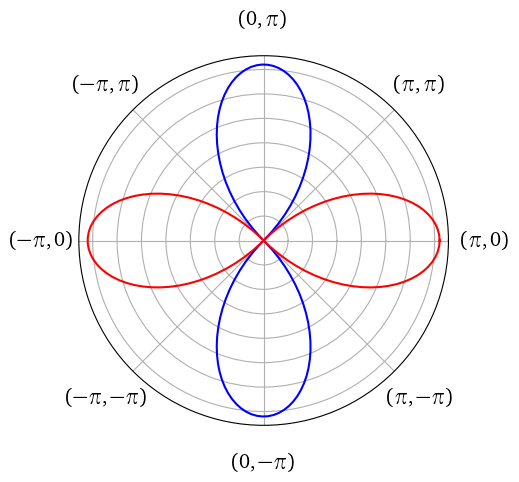

In [22]:
import numpy as np
import matplotlib.pyplot as plt
# plt.gcf().set_size_inches(7/2.54,4.5/2.54)
N = 200
theta = np.linspace(0, 2 * np.pi, N)
k = 2.5  # Rayon de la surface de Fermi circulaire
a = 1  # = 1 pour D, = 2 pour D2

def F(x, pos=True):
    r = np.cos(a * k * np.cos(theta)) - np.cos(a * k * np.sin(theta))
    if pos:
        return np.heaviside(r, 0) * r
    else:
        return -(1 - np.heaviside(r, 0)) * r

# Création de la figure
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, F(theta, True), 'b-', label='F(theta, True)')
ax.plot(theta, F(theta, False), 'r-', label='F(theta, False)')
# Personnaliser les étiquettes d'angle en radians
angles = np.arange(0, 2 * np.pi, np.pi / 4)  # Étiquettes tous les π/4
labels = [r"$(\pi,0)$", r"$(\pi,\pi)$", r"$(0,\pi)$", r"$(-\pi,\pi)$",
          r"$(-\pi,0)$", r"$(-\pi,-\pi)$", r"$(0,-\pi)$", r"$(\pi,-\pi)$"]
ax.set_thetagrids(angles * 180 / np.pi, labels,fontsize=15)
ax.set_xticklabels([])

# Ajouter manuellement les labels aux positions désirées
for angle, label in zip(angles, labels):
    ax.text(angle, 1.2, label, fontsize=15, ha='center', va='center', transform=ax.get_xaxis_transform())
ax.set_yticklabels([])
# plt.savefig("gap_dwave_polaire.pdf")
plt.show()

2.0 -2.0


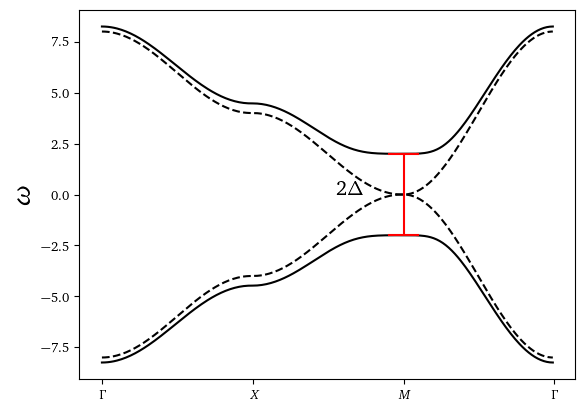

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
ky1,ky2,ky3 = np.zeros(100),np.linspace(0,np.pi,100),np.linspace(np.pi,0,100)
kx1,kx2,kx3 = np.linspace(0,np.pi,100),np.zeros(100)+np.pi,np.linspace(np.pi,0,100)
kx,ky=np.concatenate((kx1,kx2,kx3)),np.concatenate((ky1,ky2,ky3))
epsi = -2*(np.cos(kx)+np.cos(ky))
delta,mu = 2,4
omega1 = np.sqrt((epsi-mu)**2+delta**2)
omega2 = -np.sqrt((epsi-mu)**2+delta**2)
omega3 = np.sqrt((epsi-mu)**2)
omega4 = -np.sqrt((epsi-mu)**2)
k_points = [0, 100, 200, 300]
k_labels = [r'$\Gamma$', r'$X$', r'$M$', r'$\Gamma$']
print(min(omega1),max(omega2))
# Configurer les ticks et les étiquettes de l'axe des x
plt.xticks(k_points, k_labels)
plt.plot(omega1,color="black")
plt.plot(omega2,color="black")
plt.plot(omega3,color="black",linestyle = "--")
plt.plot(omega4,color="black",linestyle = "--")
plt.ylabel("$\omega$",fontsize=20)
plt.vlines(200,-2,2,color="red")
plt.hlines(2,190,210,color="red")
plt.hlines(-2,190,210,color="red")
plt.text(155,0,"$2\Delta$",fontsize=15)
# plt.savefig("BCS_dispersion.pdf")
plt.show()

Exemple PCA

In [24]:
import numpy as np
# Paramètres de la droite
a, b = 5, 1  # Pente et intercept
n_points = 10
noise_level =20  # Niveau de bruit

# Génération des points sur la droite avec du bruit
x_values = np.linspace(-5, 7, n_points)
y_values = a * x_values + b + np.random.normal(0, noise_level, n_points)

pente_droite_essai = 3
ligne2x = np.linspace(-20, 20, n_points)
ligne2y = pente_droite_essai * ligne2x 

[[ 0.15026123  0.98864633]
 [ 0.98864633 -0.15026123]]
[0.98713172 0.01286828]
[64.43984726  7.3574493 ]
[ 1.         15.74614787]


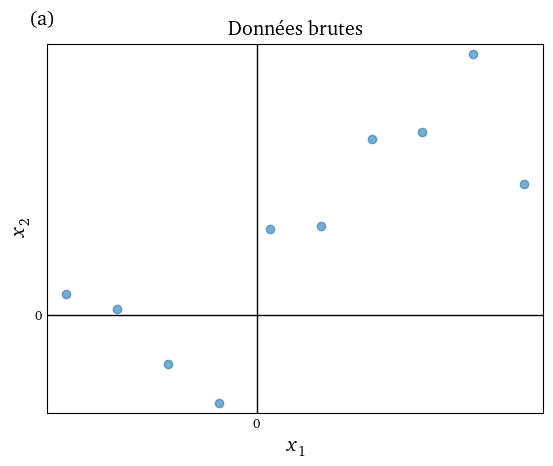

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
fig,ax = plt.subplots()
pente_droite_essai = 3


data = np.array([[x_values[x],y_values[x]] for x in range(len(x_values))])
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
print(pca.components_)
comp = pca.components_
pente_droite_ideal = comp[0][1]/comp[0][0]
pente_droite_ideal2 = comp[1][1]/comp[1][0]
droite_ideal = pente_droite_ideal*ligne2x
droite_ideal2 = pente_droite_ideal2*ligne2x
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.mean_)
data_ligne2 = np.array([[ligne2x[x],ligne2y[x]] for x in range(len(ligne2x))])
inter_liste = []
inter_ideal_liste = []
for point in data:
    bb = point[1]+(point[0]/3)
    interx = (bb*pente_droite_essai)/(pente_droite_essai**2+1)
    intery = (bb*pente_droite_essai**2)/(pente_droite_essai**2+1)
    inter_liste.append([interx,intery])
for point in data:
    bb = point[1]+(point[0]/pente_droite_ideal)
    interx = (bb*pente_droite_ideal)/(pente_droite_ideal**2+1)
    intery = (bb*pente_droite_ideal**2)/(pente_droite_ideal**2+1)
    inter_ideal_liste.append([interx,intery])
inter_arr = np.array(inter_liste)
ax.plot(data[:,0],data[:,1],"o", alpha=0.6)
ax.set_xlabel("$x_1$",fontsize=15)
ax.set_ylabel("$x_2$",fontsize=15)
plt.grid(True, linestyle='-', color='black', linewidth=1)
plt.gca().set_xticks([0])  # Afficher uniquement x=0
plt.gca().set_yticks([0])  # Afficher uniquement y=0
plt.gca().tick_params(axis='both', which='both', length=0)
plt.xlim(min(data[:,0])-0.5,max(data[:,0]+0.5))
plt.ylim(min(data[:,1])-2,max(data[:,1]+2))
plt.title("Données brutes",fontsize=15)
fig.text(0.1, 0.95, f"(a)", weight='bold', va='top', ha='left',fontsize=15)
# plt.savefig("PCA_data_only.pdf")
plt.show()

[[ 0.15026123  0.98864633]
 [ 0.98864633 -0.15026123]]
[0.98713172 0.01286828]
[64.43984726  7.3574493 ]
[ 1.         15.74614787]


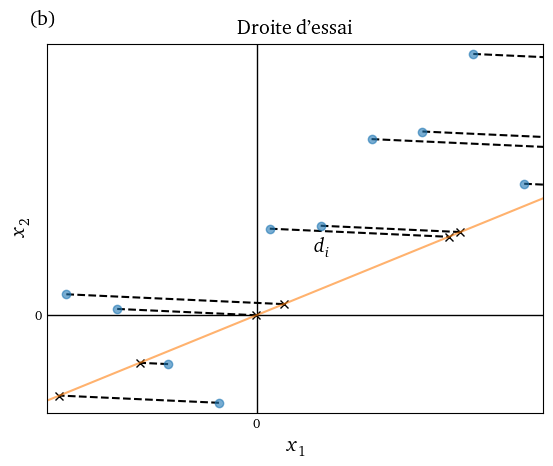

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
fig,ax = plt.subplots()
pente_droite_essai = 3


data = np.array([[x_values[x],y_values[x]] for x in range(len(x_values))])



pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
print(pca.components_)
comp = pca.components_
pente_droite_ideal = comp[0][1]/comp[0][0]
pente_droite_ideal2 = comp[1][1]/comp[1][0]
droite_ideal = pente_droite_ideal*ligne2x
droite_ideal2 = pente_droite_ideal2*ligne2x
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.mean_)
data_ligne2 = np.array([[ligne2x[x],ligne2y[x]] for x in range(len(ligne2x))])
inter_liste = []
inter_ideal_liste = []
for point in data:
    bb = point[1]+(point[0]/3)
    interx = (bb*pente_droite_essai)/(pente_droite_essai**2+1)
    intery = (bb*pente_droite_essai**2)/(pente_droite_essai**2+1)
    plt.plot([point[0],interx],[point[1],intery],"--",color="black")
    plt.plot(interx,intery,"x",color="black")
    inter_liste.append([interx,intery])

for point in data:
    bb = point[1]+(point[0]/pente_droite_ideal)
    interx = (bb*pente_droite_ideal)/(pente_droite_ideal**2+1)
    intery = (bb*pente_droite_ideal**2)/(pente_droite_ideal**2+1)
    inter_ideal_liste.append([interx,intery])
inter_arr = np.array(inter_liste)
ligne3x = np.linspace(0, inter_arr[9][0], n_points)
ligne3y = pente_droite_essai * ligne3x


ax.plot(data[:,0],data[:,1],"o", alpha=0.6)
ax.plot(ligne2x,ligne2y,"-", alpha=0.6)
ax.set_xlabel("$x_1$",fontsize=15)
ax.set_ylabel("$x_2$",fontsize=15)
plt.grid(True, linestyle='-', color='black', linewidth=1)
plt.gca().set_xticks([0])  # Afficher uniquement x=0
plt.gca().set_yticks([0])  # Afficher uniquement y=0
plt.gca().tick_params(axis='both', which='both', length=0)
plt.xlim(min(data[:,0])-0.5,max(data[:,0]+0.5))
plt.ylim(min(data[:,1])-2,max(data[:,1]+2))
plt.title("Droite d'essai",fontsize=15)
plt.text(1.5, 15, f"$d_i$", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.1, 0.95, f"(b)", weight='bold', va='top', ha='left',fontsize=15)
# plt.savefig("PCA_data_ligne_essai.pdf")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'

fig, ax = plt.subplots()

# Données
pente_droite_essai = 3
data = np.array([[x_values[x], y_values[x]] for x in range(len(x_values))])


# PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
comp = pca.components_
pente_droite_ideal = comp[0][1] / comp[0][0]
droite_ideal = pente_droite_ideal * ligne2x



# Projection des points sur la droite PCA
inter_ideal_liste = []
for point in data:
    bb = point[1] + (point[0] / pente_droite_ideal)
    interx = (bb * pente_droite_ideal) / (pente_droite_ideal**2 + 1)
    intery = (bb * pente_droite_ideal**2) / (pente_droite_ideal**2 + 1)
    ax.plot([point[0], interx], [point[1], intery], "--", color="black")
    ax.plot(interx, intery, "x", color="black")
    inter_ideal_liste.append([interx, intery])

# Tracé des points et droite idéale
ax.plot(data[:, 0], data[:, 1], "o", alpha=0.6)
ax.plot(ligne2x, droite_ideal, "-", alpha=0.6, color="green")
ax.arrow(0, 0, comp[0][0], comp[0][1], color="green", width=0.01)

ax.set_xlabel("$x_1$", fontsize=15)
ax.set_ylabel("$x_2$", fontsize=15)
ax.grid(True, linestyle='-', color='black', linewidth=1)
ax.set_xticks([0])
ax.set_yticks([0])
ax.tick_params(axis='both', which='both', length=0)
ax.set_xlim(min(data[:, 0]) - 0.5, max(data[:, 0] + 0.5))
ax.set_ylim(min(data[:, 1]) - 2, max(data[:, 1] + 2))
ax.set_title("Droite optimisée $PC_1$",fontsize=15)
plt.text(0.7, 15, f"$d_i$", weight='bold', va='top', ha='left',fontsize=15)
fig.text(0.1, 0.95, f"(c)", weight='bold', va='top', ha='left', fontsize=15)

# === Ajout de l'inset ===
ax_inset = inset_axes(ax, width="30%", height="30%", loc="upper left")
ax_inset.plot(data[:, 0], data[:, 1], "o", alpha=0.6)
ax_inset.plot(ligne2x, droite_ideal, "-", alpha=0.6, color="green")

# Ajustement des limites de l'inset
ax_inset.set_xlim(-0.1, 0.5)
ax_inset.set_ylim(-0.1, 1.1)
ax_inset.grid(True, linestyle=':', linewidth=0.5)

# Suppression des labels inutiles dans l'inset
ax_inset.set_xticks([])
ax_inset.set_yticks([])

# Ajout d'un rectangle reliant l'inset à la zone zoomée
mark_inset(ax, ax_inset, loc1=2, loc2=4, fc="none", ec="black", linestyle="--")
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ax_inset = inset_axes(ax, width="30%", height="30%", loc="upper left")  # Inset en haut à gauche
ax_inset.set_xlim(-0.1, 0.3)
ax_inset.set_ylim(-0.1, 1.1)

# Affichage des données dans l'inset
ax_inset.plot(data[:, 0], data[:, 1], "o", alpha=0.6)
ax_inset.plot(ligne2x, droite_ideal, "-", alpha=0.6, color="green")

# Ajout de la flèche dans l'inset
ax_inset.arrow(0, 0, comp[0][0], comp[0][1], color="green", width=0.005, head_width=0.03)

# Suppression des ticks pour un visuel plus clair
ax_inset.grid(True, linestyle='-', color='black', linewidth=1)
ax_inset.set_xticks([0])
ax_inset.set_yticks([0])


# Sauvegarde et affichage
# plt.savefig("PCA_data_ligne_ideal_with_inset.pdf")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'

fig, ax = plt.subplots()

# Données
pente_droite_essai = 3
data = np.array([[x_values[x], y_values[x]] for x in range(len(x_values))])
scaler = StandardScaler()
data = scaler.fit_transform(data)
# PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
comp = pca.components_
ratio = pca.explained_variance_ratio_
pente_droite_ideal = comp[0][1] / comp[0][0]
droite_ideal = pente_droite_ideal * ligne2x
pente_droite_ideal2 = comp[1][1]/comp[1][0]
droite_ideal2 = pente_droite_ideal2*ligne2x

# Projection des points sur la droite PCA
inter_ideal_liste = []
for point in data:
    bb = point[1] + (point[0] / pente_droite_ideal)
    interx = (bb * pente_droite_ideal) / (pente_droite_ideal**2 + 1)
    intery = (bb * pente_droite_ideal**2) / (pente_droite_ideal**2 + 1)
    inter_ideal_liste.append([interx, intery])

# Tracé des points et droite idéale
ax.plot(data[:, 0], data[:, 1], "o", alpha=0.6)
ax.plot(ligne2x, droite_ideal, "-", alpha=0.6, color="green")
ax.plot(ligne2x,droite_ideal2,"-", alpha=0.6,color="red")
ax.arrow(0, 0, comp[0][0], comp[0][1], color="green", width=0.01)
ax.arrow(0, 0, comp[1][0], comp[1][1], color="red", width=0.01)

ax.set_xlabel("$x_1$", fontsize=15)
ax.set_ylabel("$x_2$", fontsize=15)
ax.grid(True, linestyle='-', color='black', linewidth=1)
ax.set_xticks([0])
ax.set_yticks([0])
ax.tick_params(axis='both', which='both', length=0)
ax.set_xlim(min(data[:, 0]) - 0.5, max(data[:, 0] + 0.5))
ax.set_ylim(min(data[:, 1]) - 2, max(data[:, 1] + 2))
ax.set_title("$PC_1$ et $PC_2$",fontsize=15)
fig.text(0.1, 0.95, f"(d)", weight='bold', va='top', ha='left', fontsize=15)

# === Ajout de l'inset ===
ax_inset = inset_axes(ax, width="30%", height="30%", loc="upper left")
ax_inset.plot(data[:, 0], data[:, 1], "o", alpha=0.6)
ax_inset.plot(ligne2x, droite_ideal, "-", alpha=0.6, color="green")

# Ajustement des limites de l'inset
ax_inset.set_xlim(-0.1, 0.5)
ax_inset.set_ylim(-0.1, 1.1)
ax_inset.grid(True, linestyle=':', linewidth=0.5)


# Suppression des labels inutiles dans l'inset
ax_inset.set_xticks([])
ax_inset.set_yticks([])

# Ajout d'un rectangle reliant l'inset à la zone zoomée
mark_inset(ax, ax_inset, loc1=2, loc2=4, fc="none", ec="black", linestyle="--")
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ax_inset = inset_axes(ax, width="30%", height="30%", loc="upper left")  # Inset en haut à gauche
ax_inset.set_xlim(-0.3, 1.2)
ax_inset.set_ylim(-0.3, 1.2)


# Affichage des données dans l'inset
ax_inset.plot(data[:, 0], data[:, 1], "o", alpha=0.6)
ax_inset.plot(ligne2x, droite_ideal, "-", alpha=0.6, color="green")
ax_inset.plot(ligne2x, droite_ideal2, "-", alpha=0.6, color="red")


# Ajout de la flèche dans l'inset
ax_inset.arrow(0, 0, comp[0][0], comp[0][1], color="green", width=0.008, head_width=0.06)
ax_inset.arrow(0, 0, comp[1][0], comp[1][1], color="red", width=0.01, head_width=0.06)


# Suppression des ticks pour un visuel plus clair
ax_inset.grid(True, linestyle='-', color='black', linewidth=1)
ax_inset.set_xticks([0])
ax_inset.set_yticks([0])

# plt.savefig("PCA_data_ligne_ideal2_with_inset.pdf")
plt.show()

[[ 0.15026123  0.98864633]
 [ 0.98864633 -0.15026123]]
[64.43984726  7.3574493 ]
0.8975247028776013
[0.98713172 0.01286828]
[64.43984726  7.3574493 ]
[ 1.         15.74614787]


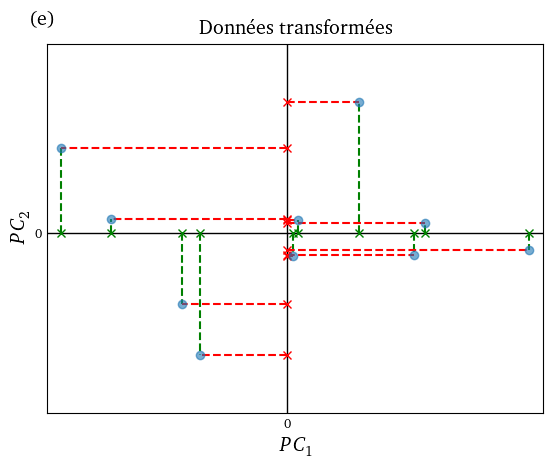

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
fig,ax = plt.subplots()
pente_droite_essai = 3

data = np.array([[x_values[x],y_values[x]] for x in range(len(x_values))])
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
print(pca.components_)
print(pca.singular_values_)
comp = pca.components_
singular = pca.singular_values_
print(singular[0]/(singular[0]+singular[1]))
pente_droite_ideal = comp[0][1]/comp[0][0]
pente_droite_ideal2 = comp[1][1]/comp[1][0]
droite_ideal = pente_droite_ideal*ligne2x
droite_ideal2 = pente_droite_ideal2*ligne2x
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.mean_)
data_ligne2 = np.array([[ligne2x[x],ligne2y[x]] for x in range(len(ligne2x))])
inter_liste = []
inter_ideal_liste = []
for point in data:
    bb = point[1]+(point[0]/3)
    interx = (bb*pente_droite_essai)/(pente_droite_essai**2+1)
    intery = (bb*pente_droite_essai**2)/(pente_droite_essai**2+1)
    inter_liste.append([interx,intery])
for point in data:
    bb = point[1]+(point[0]/pente_droite_ideal)
    interx = (bb*pente_droite_ideal)/(pente_droite_ideal**2+1)
    intery = (bb*pente_droite_ideal**2)/(pente_droite_ideal**2+1)
    inter_ideal_liste.append([interx,intery])
for point in data_pca:
    plt.plot(point[0],0,"x",color="green")
    plt.plot([point[0],point[0]],[0,point[1]],"--",color="green")
    plt.plot(0,point[1],"x",color="red")
    plt.plot([0,point[0]],[point[1],point[1]],"--",color="red")
inter_arr = np.array(inter_liste)
ax.plot(data_pca[:,0],data_pca[:,1],"o", alpha=0.6)


ax.set_xlabel("$PC_1$",fontsize=15)
ax.set_ylabel("$PC_2$",fontsize=15)
ax.set_title("Données transformées",fontsize=15)
# plt.text()
plt.grid(True, linestyle='-', color='black', linewidth=1)
plt.gca().set_xticks([0])  # Afficher uniquement x=0
plt.gca().set_yticks([0])  # Afficher uniquement y=0
plt.gca().tick_params(axis='both', which='both', length=0)
plt.xlim(min(data_pca[:,0])-2,max(data_pca[:,0]+2))
plt.ylim(min(data_pca[:,1])-2,max(data_pca[:,1]+2))
fig.text(0.1, 0.95, f"(e)", weight='bold', va='top', ha='left',fontsize=15)
# plt.savefig("PCA_data_transfromed.pdf")
plt.show()

[[ 0.15026123  0.98864633]
 [ 0.98864633 -0.15026123]]
[64.43984726  7.3574493 ]
[0.98713172 0.01286828]
[64.43984726  7.3574493 ]
[ 1.         15.74614787]


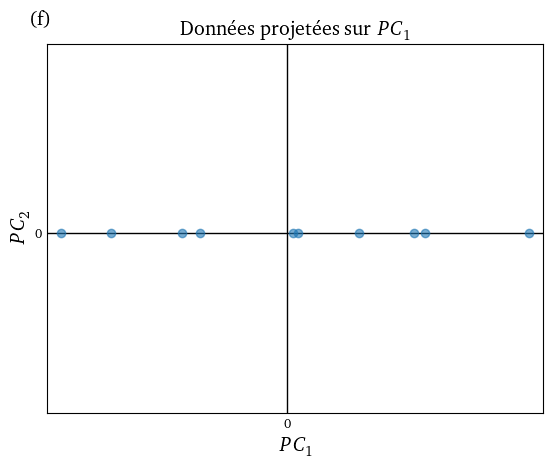

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'
fig,ax = plt.subplots()
pente_droite_essai = 3

data = np.array([[x_values[x],y_values[x]] for x in range(len(x_values))])
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
print(pca.components_)
print(pca.singular_values_)
comp = pca.components_
singular = pca.singular_values_
pente_droite_ideal = comp[0][1]/comp[0][0]
pente_droite_ideal2 = comp[1][1]/comp[1][0]
droite_ideal = pente_droite_ideal*ligne2x
droite_ideal2 = pente_droite_ideal2*ligne2x
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.mean_)
data_ligne2 = np.array([[ligne2x[x],ligne2y[x]] for x in range(len(ligne2x))])
inter_liste = []
inter_ideal_liste = []
for point in data:
    bb = point[1]+(point[0]/3)
    interx = (bb*pente_droite_essai)/(pente_droite_essai**2+1)
    intery = (bb*pente_droite_essai**2)/(pente_droite_essai**2+1)
    inter_liste.append([interx,intery])
for point in data:
    bb = point[1]+(point[0]/pente_droite_ideal)
    interx = (bb*pente_droite_ideal)/(pente_droite_ideal**2+1)
    intery = (bb*pente_droite_ideal**2)/(pente_droite_ideal**2+1)
    inter_ideal_liste.append([interx,intery])
inter_arr = np.array(inter_liste)
ax.plot(data_pca[:,0],np.zeros(len(data_pca[:,0])),"o", alpha=0.6)

ax.set_xlabel("$PC_1$",fontsize=15)
ax.set_ylabel("$PC_2$",fontsize=15)
ax.set_title("Données projetées sur $PC_1$",fontsize=15)
# plt.text()
plt.grid(True, linestyle='-', color='black', linewidth=1)
plt.gca().set_xticks([0])  # Afficher uniquement x=0
plt.gca().set_yticks([0])  # Afficher uniquement y=0
plt.gca().tick_params(axis='both', which='both', length=0)
plt.xlim(min(data_pca[:,0])-2,max(data_pca[:,0]+2))
plt.ylim(min(data_pca[:,1])-2,max(data_pca[:,1]+2))
fig.text(0.1, 0.95, f"(f)", weight='bold', va='top', ha='left',fontsize=15)
# plt.savefig("PCA_data_transfromed_projected.pdf")
plt.show()

Exemple RTF


In [33]:
import random
liste_remove = []
for rand in range(50000):
    ind = random.randint(0, 9999)
    liste_remove.append(ind)

10000
50000
DONE
74 74 74
-0.2982926357953945 6.264145351703284
-0.3141592653589793 6.5973445725385655


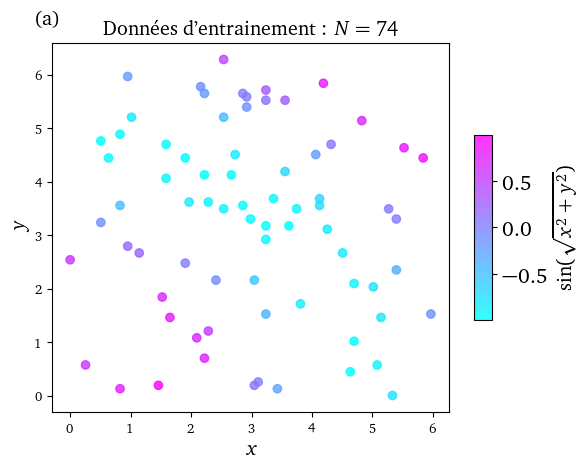

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'



fig,ax = plt.subplots()
grille = []
x = np.linspace(0,2*np.pi,100)
y = np.linspace(0,2*np.pi,100)
x_tot,y_tot,z_tot = [],[],[]
for xx in x:
    for yy in y:
        x_tot.append(xx)
        y_tot.append(yy)
        z = np.sin(np.sqrt(xx**2+yy**2))
        z_tot.append(z)
xdata_test = np.array([[x_tot[v],y_tot[v]] for v in range(len(x_tot))])
print(len(z_tot))
print(len(liste_remove))
print("DONE")
my_cmap1 = plt.get_cmap('cool')
filtered_x = [v for i, v in enumerate(x_tot) if i not in liste_remove]
filtered_y = [v for i, v in enumerate(y_tot) if i not in liste_remove]
filtered_z = [v for i, v in enumerate(z_tot) if i not in liste_remove]
print(len(filtered_x),len(filtered_y),len(filtered_z))
sctt = ax.scatter(filtered_x, filtered_y,
                    alpha = 0.8,
                    c = filtered_z, 
                    cmap = my_cmap1, 
                    marker ='o')
cbar = fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=10, label='$\sin(\sqrt{x^2+y^2})$')
cbar.set_label(r'$\sin(\sqrt{x^2+y^2})$', fontsize=15)
cbar.ax.tick_params(labelsize=16)
xtrain_data = np.array([[filtered_x[v],filtered_y[v]] for v in range(len(filtered_x))])
ytrain_data = np.array(filtered_z)
regressor = DecisionTreeRegressor(random_state=0,max_depth=3)
RTF_regressor = RandomForestRegressor()
regressor.fit(xtrain_data,ytrain_data)
RTF_regressor.fit(xtrain_data,ytrain_data)
ax.set_title(f"Données d'entrainement : $N={len(filtered_x)}$", fontsize=15)
ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
print(x_min,x_max)
print(y_min,y_max)

reg = DecisionTreeRegressor(random_state=0,max_depth=3)
reg.fit(xtrain_data,ytrain_data)
reg.tree_.threshold[:3] = [-2, 0, 2]
fig.text(0.1, 0.95, f"(a)", weight='bold', va='top', ha='left',fontsize=15)

# plt.savefig("Decision_tree_exemple_data_train.pdf")
plt.show()
plt.close()

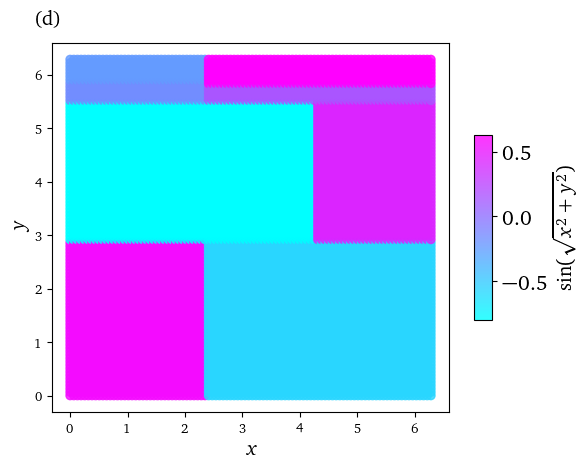

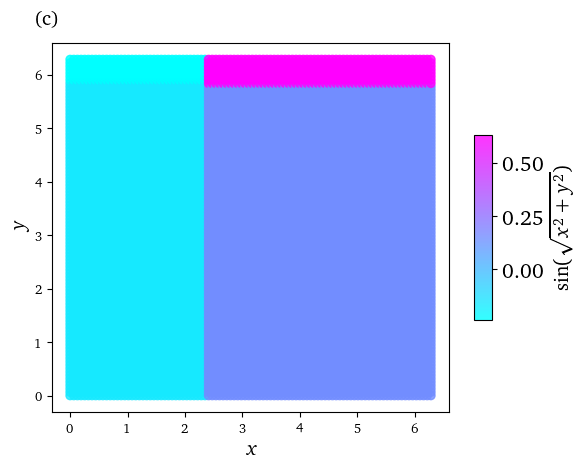

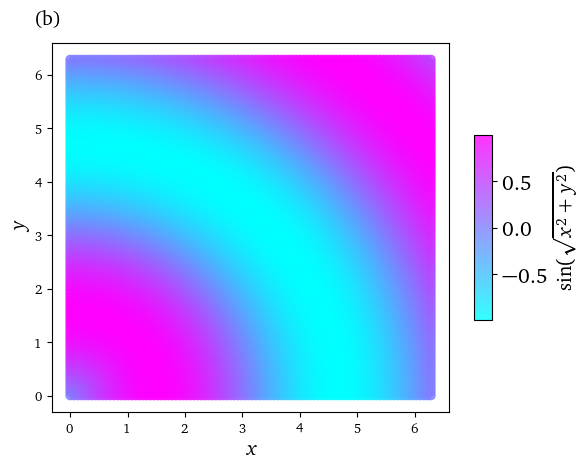

[(0, 1, 5.458120584487915), (1, 1, 2.8559932708740234), (2, 0, 2.3482611179351807), (3, -2, -2.0), (4, -2, -2.0), (5, 0, 4.283990144729614), (6, -2, -2.0), (7, -2, -2.0), (8, 0, 2.3799943923950195), (9, 1, 5.870652914047241), (10, -2, -2.0), (11, -2, -2.0), (12, 1, 5.775453090667725), (13, -2, -2.0), (14, -2, -2.0)]


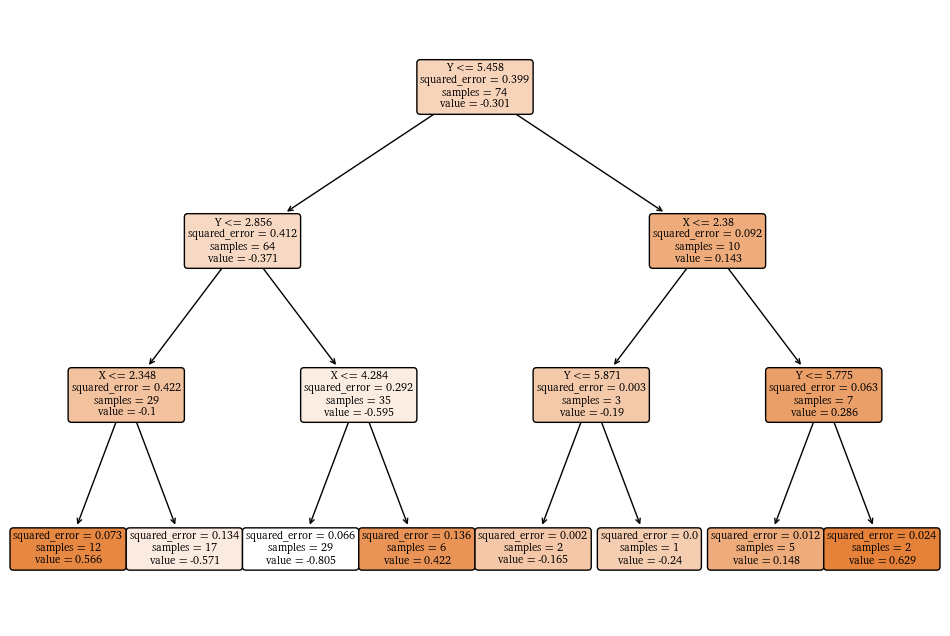

[(0, 1, -2.0), (1, 1, 0.0), (2, 0, 2.0), (3, -2, -2.0), (4, -2, -2.0), (5, 0, 4.283990144729614), (6, -2, -2.0), (7, -2, -2.0), (8, 0, 2.3799943923950195), (9, 1, 5.870652914047241), (10, -2, -2.0), (11, -2, -2.0), (12, 1, 5.775453090667725), (13, -2, -2.0), (14, -2, -2.0)]


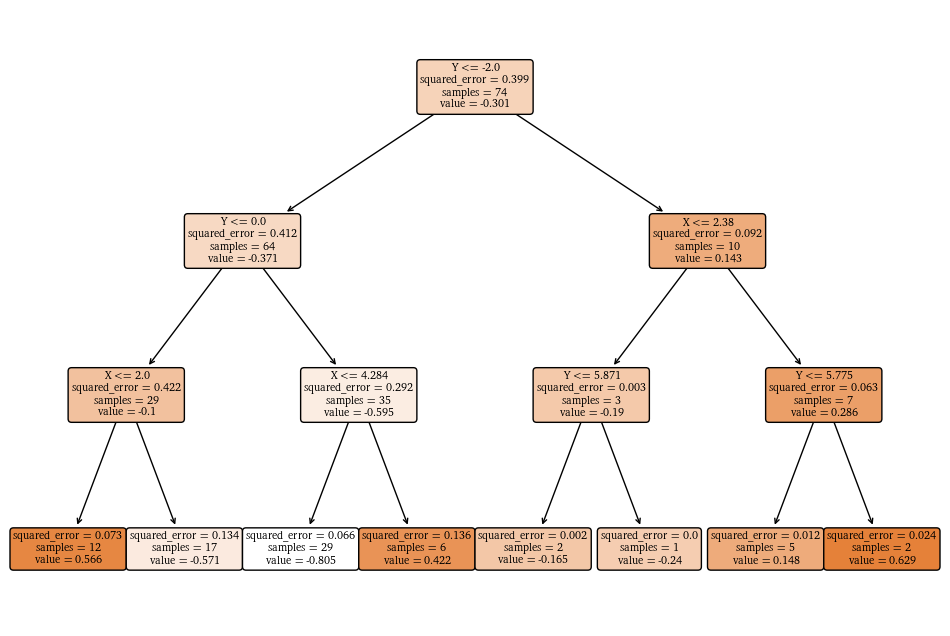

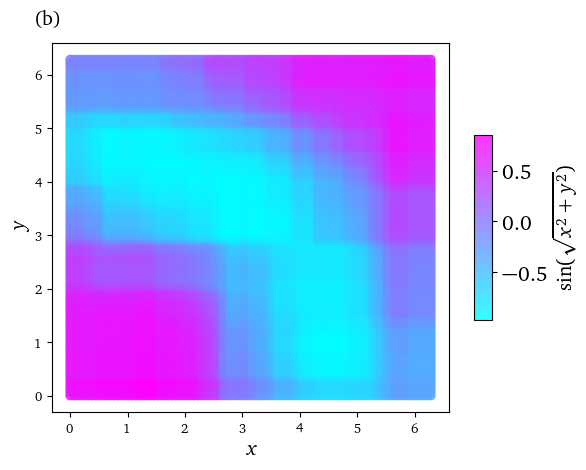

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

fig,ax = plt.subplots()
ydata_test = regressor.predict(xdata_test)
sctt = ax.scatter(xdata_test[:,0], xdata_test[:,1],
                    alpha = 0.8,
                    c = ydata_test, 
                    cmap = my_cmap1, 
                    marker ='o')
cbar = fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=10, label='$\sin(\sqrt{x^2+y^2})$')
cbar.set_label(r'$\sin(\sqrt{x^2+y^2})$', fontsize=15)
cbar.ax.tick_params(labelsize=16)
ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)
fig.text(0.1, 0.95, f"(d)", weight='bold', va='top', ha='left',fontsize=15)

plt.savefig("Decision_tree_exemple_data_good_split.pdf")
plt.show()
plt.close()

fig,ax = plt.subplots()
ydata_test = reg.predict(xdata_test)
sctt = ax.scatter(xdata_test[:,0], xdata_test[:,1],
                    alpha = 0.8,
                    c = ydata_test, 
                    cmap = my_cmap1, 
                    marker ='o')
cbar = fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=10, label='$\sin(\sqrt{x^2+y^2})$')
cbar.set_label(r'$\sin(\sqrt{x^2+y^2})$', fontsize=15)
cbar.ax.tick_params(labelsize=16)
ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)
fig.text(0.1, 0.95, f"(c)", weight='bold', va='top', ha='left',fontsize=15)

# plt.savefig("Decision_tree_exemple_data_bad_split.pdf")
plt.show()
plt.close()

fig,ax = plt.subplots()
sctt = ax.scatter(x_tot, y_tot,
                    alpha = 0.8,
                    c = z_tot, 
                    cmap = my_cmap1, 
                    marker ='o')
cbar = fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=10, label='$\sin(\sqrt{x^2+y^2})$')
cbar.set_label(r'$\sin(\sqrt{x^2+y^2})$', fontsize=15)
cbar.ax.tick_params(labelsize=16)
ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)
fig.text(0.1, 0.95, f"(b)", weight='bold', va='top', ha='left',fontsize=15)

# plt.savefig("Decision_tree_exemple_data.pdf")
plt.show()
plt.close()


tree_structure = regressor.tree_
conditions = []

for i in range(tree_structure.node_count):
    feature = tree_structure.feature[i]
    threshold = tree_structure.threshold[i]
    conditions.append((i, feature, threshold))

print(conditions)

plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=["X","Y"], rounded=True)
plt.show()
plt.close()


tree_structure2 = reg.tree_
conditions2 = []

for i in range(tree_structure2.node_count):
    feature = tree_structure2.feature[i]
    threshold = tree_structure2.threshold[i]
    conditions2.append((i, feature, threshold))

print(conditions2)
plt.figure(figsize=(12, 8))
plot_tree(reg, filled=True, feature_names=["X","Y"], rounded=True)
plt.show()
plt.close()


fig,ax = plt.subplots()
ydata_test = RTF_regressor.predict(xdata_test)
sctt = ax.scatter(xdata_test[:,0], xdata_test[:,1],
                    alpha = 0.8,
                    c = ydata_test, 
                    cmap = my_cmap1, 
                    marker ='o')
cbar = fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=10, label='$\sin(\sqrt{x^2+y^2})$')
cbar.set_label(r'$\sin(\sqrt{x^2+y^2})$', fontsize=15)
cbar.ax.tick_params(labelsize=16)
ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)
fig.text(0.1, 0.95, f"(b)", weight='bold', va='top', ha='left',fontsize=15)

# plt.savefig("random_forest_exemple_max_depth3.pdf")
# plt.savefig("random_forest_exemple.pdf")
plt.show()
plt.close()

0.4472135954999579


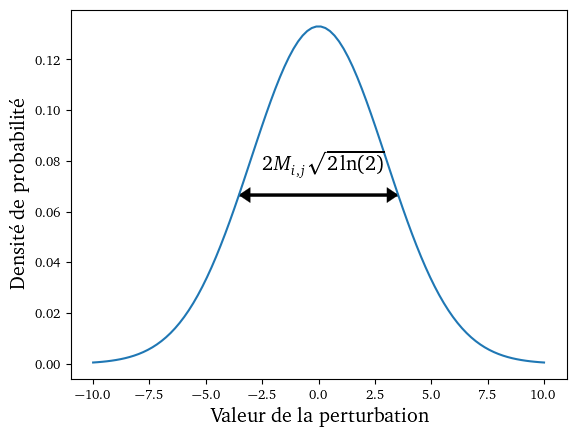

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage[charter]{mathdesign}'

sigma = 3
mu = 0
x = np.linspace(-10,10,100)
def normale(x,mu,sigma):
    res = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(((x-mu)**2/sigma**2)*(-1/2))
    return res
print(np.sqrt(0.2))
maxi = normale(0,mu,sigma)
mi_hauteur = maxi/2
largeur_mi_hauteur = 2*np.sqrt(2*np.log(2))*sigma
plt.plot(x,normale(x,mu,sigma))
plt.arrow(-largeur_mi_hauteur/2, mi_hauteur, largeur_mi_hauteur, 0, head_width=0.006, head_length=0.5, linewidth=0.2, color='black', length_includes_head=True)
plt.arrow(largeur_mi_hauteur/2, mi_hauteur, -largeur_mi_hauteur, 0, head_width=0.006, head_length=0.5, linewidth=0.2, color='black', length_includes_head=True)
plt.text(-2.5,mi_hauteur+0.01,"$2M_{i,j}\sqrt{2\ln(2)}$",fontsize=15)
plt.ylabel("Densité de probabilité",fontsize=15)
plt.xlabel("Valeur de la perturbation",fontsize=15)
# plt.savefig("Incertitude_hessien.pdf")
plt.show()